# Reading in Data

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression

In [5]:
data = pd.read_csv('data/csv/data_city_seattle.csv')
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

# Testing single property type

<Axes: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

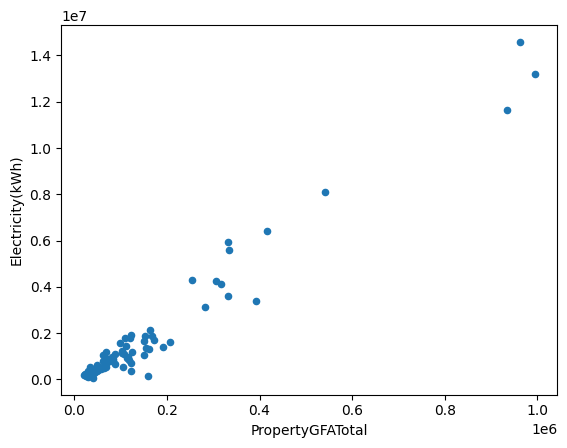

In [6]:
df = data[['PrimaryPropertyType','PropertyGFATotal','Electricity(kWh)']]
df_hotels = df[df.PrimaryPropertyType == 'Hotel']

df_hotels.plot(kind='scatter',x='PropertyGFATotal',y='Electricity(kWh)')

<Axes: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

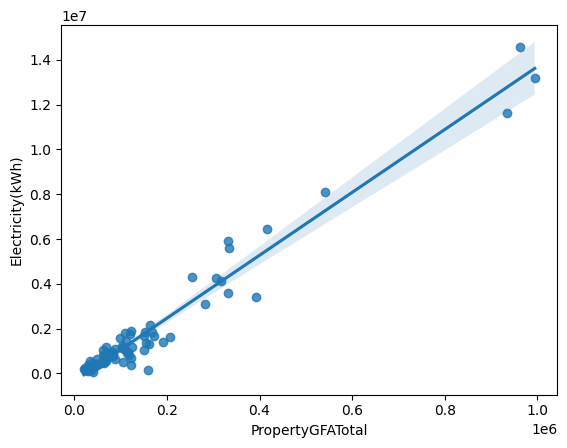

In [7]:
sns.regplot(data=df_hotels, x='PropertyGFATotal',y='Electricity(kWh)')

# Testing Multiple Asset types

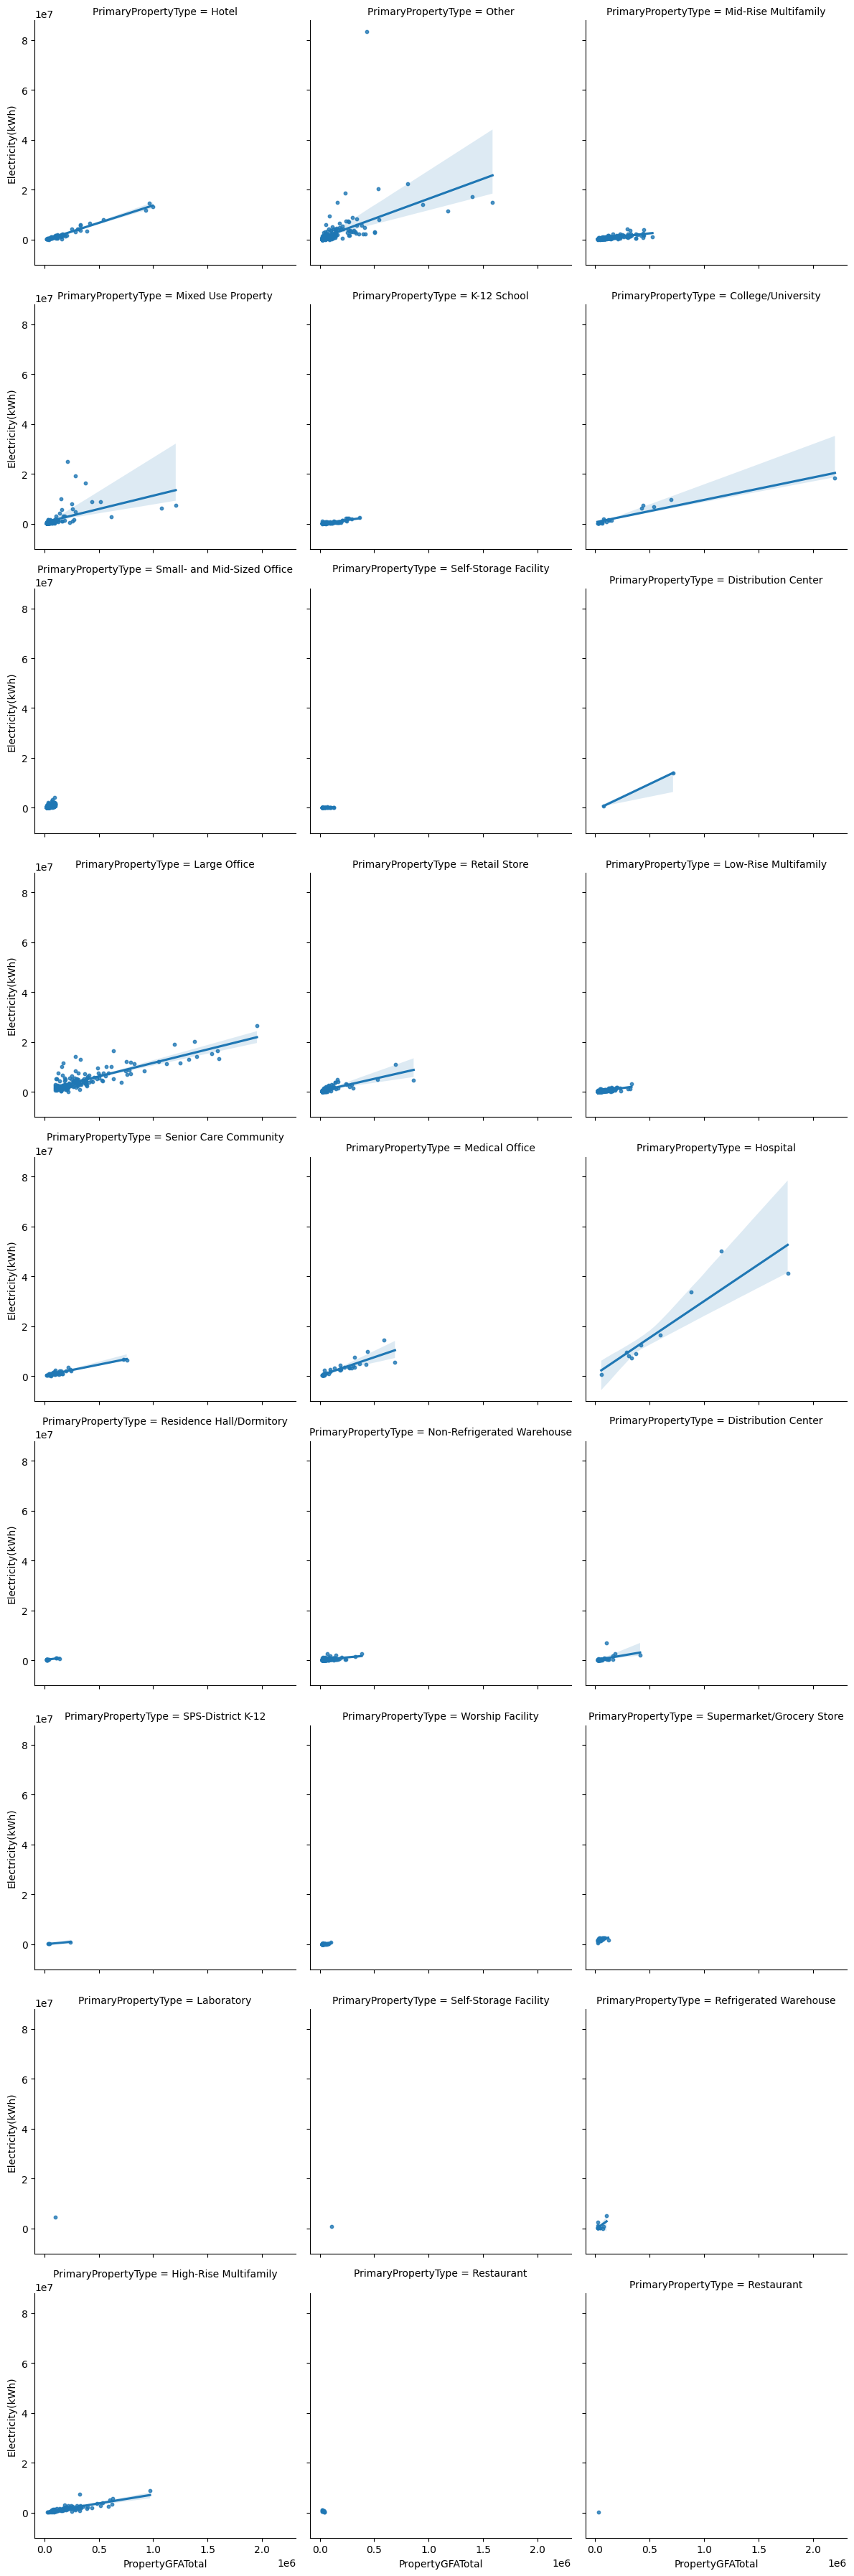

In [8]:
# Regressing GFA to Electricty consumption by property type
g = sns.FacetGrid(data=data,col='PrimaryPropertyType',col_wrap=3, height=4)
g.map(sns.regplot, 'PropertyGFATotal', 'Electricity(kWh)', scatter_kws={'s': 10})

In [9]:
data.PrimaryPropertyType.unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'College/University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility\n', 'Distribution Center', 'Large Office',
       'Retail Store', 'Low-Rise Multifamily', 'Senior Care Community',
       'Medical Office', 'Hospital', 'Residence Hall/Dormitory',
       'Non-Refrigerated Warehouse', 'Distribution Center\n',
       'SPS-District K-12', 'Worship Facility',
       'Supermarket/Grocery Store', 'Laboratory', 'Self-Storage Facility',
       'Refrigerated Warehouse', 'High-Rise Multifamily', 'Restaurant\n',
       'Restaurant'], dtype=object)

In [10]:
# Identified the following assets have high correlation

# Hospitality
df_hotels = df[df.PrimaryPropertyType == 'Hotel']

# Residential
df_lowrise_resi = df[df.PrimaryPropertyType == 'Low-Rise Multifamily']
df_midrise_resi = df[df.PrimaryPropertyType == 'Mid-Rise Multifamily']
df_highrise_resi = df[df.PrimaryPropertyType == 'High-Rise Multifamily']

# Education
df_school = df[df.PrimaryPropertyType == 'K-12 School']
df_university = df[df.PrimaryPropertyType == 'College/University']

# Office 
df_large_office = df[df.PrimaryPropertyType == 'Large Office']

# Retail (only showing some correlation)
df_retail = df[df.PrimaryPropertyType == 'Retail Store']

<Axes: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

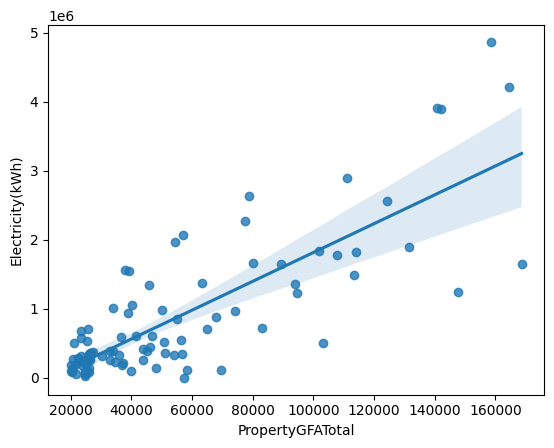

In [11]:
# remove outliers
df_retail = df_retail[df_retail.PropertyGFATotal < 200000]

# Plot regression
sns.regplot(data=df_retail,x='PropertyGFATotal',y='Electricity(kWh)')

<Axes: xlabel='PropertyGFATotal', ylabel='Electricity(kWh)'>

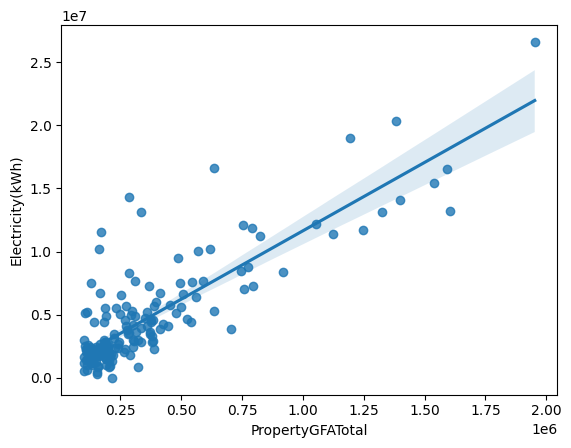

In [12]:
# remove outliers
#df_large_office = df_large_office[df_large_office.PropertyGFATotal < 200000]

# Plot regression
sns.regplot(data=df_large_office,x='PropertyGFATotal',y='Electricity(kWh)')

In [14]:
# Instantiate the model
model = LinearRegression()

# Define X and Y
x = df_large_office[['PropertyGFATotal']]
y = df_large_office['Electricity(kWh)']

# Train the model on the data
model.fit(x,y)


LinearRegression()

In [19]:
model.score(x,y)

0.705551827055714

In [20]:
# create new data input 
new_data = pd.DataFrame({'PropertyGFATotal': [1500]})
new_data

,PropertyGFATotal
0,1500


In [21]:
model.predict(new_data)

array([822606.720889])

In [29]:
# Plot the training data and regression line
fig = px.scatter(x=x['PropertyGFATotal'], y=y, title='Office: Linear Regression Fit and Prediction', labels={'x': 'PropertyGFATotal', 'y': 'Electricity(kWh)'},opacity=0.2)
fig.add_scatter(x=x['PropertyGFATotal'], y=model.predict(x), mode='lines', name='Regression Line')

# Plot the predicted value for new data with larger and transparent markers
new_data = pd.DataFrame({'PropertyGFATotal': [500000]})
predicted_value = model.predict(new_data)
fig.add_scatter(x=new_data['PropertyGFATotal'], y=predicted_value, mode='markers', marker=dict(color='green', symbol='x', size=10), name='Predicted Value for New Data')
